In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import string
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
wordcloud_mask=np.array(Image.open("/kaggle/input/word-cloud-5/stormtrooper_mask.png"))

In [3]:
df=pd.read_csv("/kaggle/input/article/article_highlights.csv")

In [4]:
df.head()

,url,article,highlights
0,https://www.dailymail.co.uk/tvshowbiz/article-...,Beyoncé showcases her incredible figure in plu...,Beyoncé has shown off her flawless beauty in a...
1,https://www.dailymail.co.uk/tvshowbiz/article-...,Radio 1 listeners in shock as sex noises are p...,BBC Radio 1 listeners were left choking on the...
2,https://www.dailymail.co.uk/tvshowbiz/article-...,"TOWIE's Dan Edgar, 33, and Ella Rae Wise, 23, ...",Dan Edgar and Ella Rae Wise put on a loved-up ...
3,https://www.dailymail.co.uk/tvshowbiz/article-...,Bradley Cooper recalls 'crazy' pitch meeting a...,Bradley Cooper discussed the 'crazy' experienc...
4,https://www.dailymail.co.uk/tvshowbiz/article-...,Margaret Qualley and Beanie Feldstein stun in ...,Margaret Qualley and Beanie Feldstein were dre...


In [5]:
df.drop(columns="url",axis=1,inplace=True)

In [6]:
df = df.astype(str)


In [7]:
df.head()

,article,highlights
0,Beyoncé showcases her incredible figure in plu...,Beyoncé has shown off her flawless beauty in a...
1,Radio 1 listeners in shock as sex noises are p...,BBC Radio 1 listeners were left choking on the...
2,"TOWIE's Dan Edgar, 33, and Ella Rae Wise, 23, ...",Dan Edgar and Ella Rae Wise put on a loved-up ...
3,Bradley Cooper recalls 'crazy' pitch meeting a...,Bradley Cooper discussed the 'crazy' experienc...
4,Margaret Qualley and Beanie Feldstein stun in ...,Margaret Qualley and Beanie Feldstein were dre...


In [8]:
df.shape

(8176, 2)

In [9]:
df.isnull().sum()

article       0
highlights    0
dtype: int64

In [10]:


def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()

        # Remove special characters and digits
        text = re.sub(r"[^a-zA-Z]", " ", text)

        # Remove punctuation
        text = text.translate(str.maketrans("", "", string.punctuation))

        # Remove emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        # Convert to lowercase
        text = text.lower()

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        text = ' '.join(tokens)

        return text
    else:
        # If the text is not a string (NaN or other), return an empty string
        return ""


In [11]:
df["clean_article"]=df["article"].apply(clean_text)

In [12]:
df["clean_highlights"]=df['highlights'].apply(clean_text)

In [13]:
df.head()

,article,highlights,clean_article,clean_highlights
0,Beyoncé showcases her incredible figure in plu...,Beyoncé has shown off her flawless beauty in a...,beyonc showcases incredible figure plunging wh...,beyonc shown flawless beauty new photo promote...
1,Radio 1 listeners in shock as sex noises are p...,BBC Radio 1 listeners were left choking on the...,radio listeners shock sex noises played greg j...,bbc radio listeners left choking cornflakes we...
2,"TOWIE's Dan Edgar, 33, and Ella Rae Wise, 23, ...",Dan Edgar and Ella Rae Wise put on a loved-up ...,towie dan edgar ella rae wise put loved displa...,dan edgar ella rae wise put loved display sun ...
3,Bradley Cooper recalls 'crazy' pitch meeting a...,Bradley Cooper discussed the 'crazy' experienc...,bradley cooper recalls crazy pitch meeting bey...,bradley cooper discussed crazy experience meet...
4,Margaret Qualley and Beanie Feldstein stun in ...,Margaret Qualley and Beanie Feldstein were dre...,margaret qualley beanie feldstein stun chic fl...,margaret qualley beanie feldstein dressed nine...


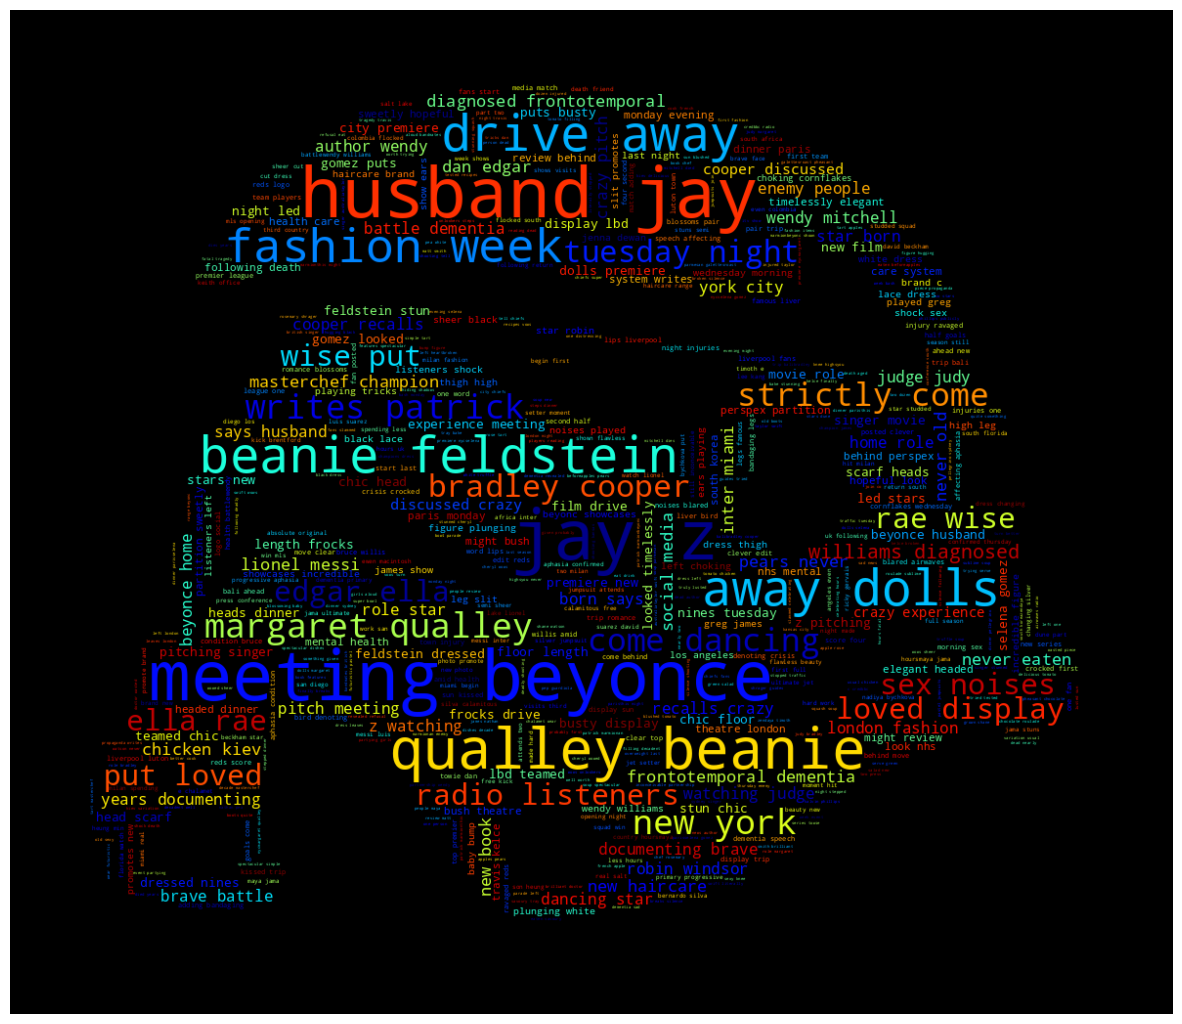

In [14]:
plt.figure(figsize=(15,15))
all_text=" ".join(df['clean_article'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="jet",mask=wordcloud_mask).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

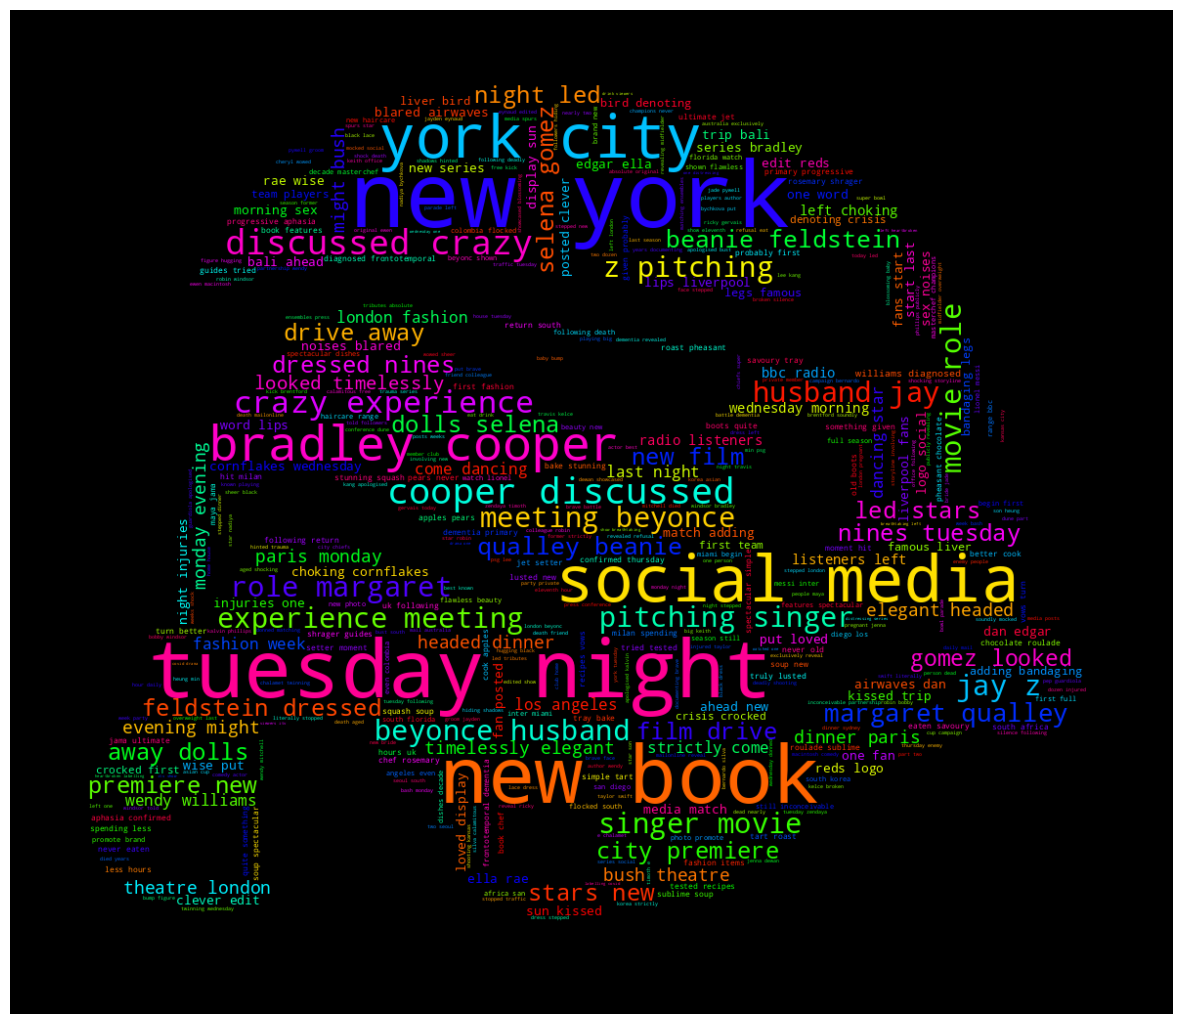

In [15]:
plt.figure(figsize=(15,15))
all_text=" ".join(df['clean_highlights'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="hsv",mask=wordcloud_mask).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
from itertools import chain
from collections import Counter
import seaborn as sns

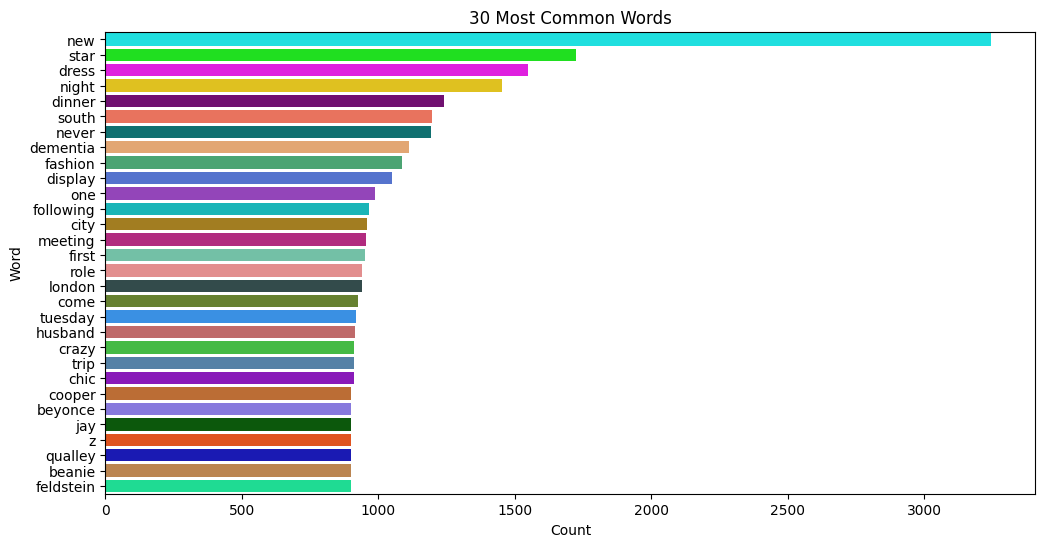

In [17]:
data_set =df["clean_article"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

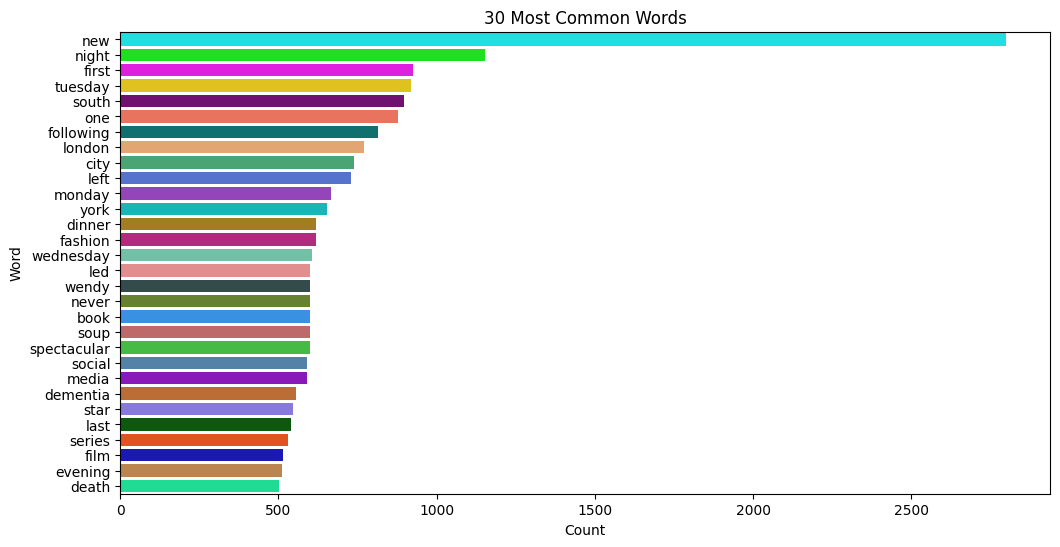

In [18]:
data_set =df["clean_highlights"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [19]:
!pip install transformers -Uqq

!pip install bert-score -Uqq
!pip install sacremoses
!pip install ohmeow-blurr -Uqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 10.1 MB/s eta 0:00:0000:010:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.7.1 requires torch>=2, but you have torch 1.13.1 which is incompatible.


In [20]:
!pip install git+https://github.com/ohmeow/blurr.git

  Cloning https://github.com/ohmeow/blurr.git to /tmp/pip-req-build-ss3sd08z
  Running command git clone --filter=blob:none --quiet https://github.com/ohmeow/blurr.git /tmp/pip-req-build-ss3sd08z
  Resolved https://github.com/ohmeow/blurr.git to commit 8e20e65037425283d3d27f7065462a0a73da91c3
  Preparing metadata (setup.py) ... done
  Created wheel for blurr: filename=blurr-1.0.6-py3-none-any.whl size=86459 sha256=debaea54b8fee7082f8da4333600a356fbea079d65e177a49685f13f546a1c63
  Stored in directory: /tmp/pip-ephem-wheel-cache-z52k2j5k/wheels/a6/7a/bf/bcc6241908f88454eadbb8d864bb4c26df0e8ed86e8b253082
Successfully built blurr


In [21]:
import torch
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

2024-02-27 14:27:58.875659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 14:27:58.875788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 14:27:59.015953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:

from transformers import BartForConditionalGeneration


In [23]:
pretrained_model_name = "sshleifer/distilbart-cnn-6-6"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name,model_cls=BartForConditionalGeneration)

hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)



config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/460M [00:00<?, ?B/s]

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [24]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization')
text_gen_kwargs

{'early_stopping': True,
 'length_penalty': 2.0,
 'max_length': 142,
 'min_length': 56,
 'no_repeat_ngram_size': 3,
 'num_beams': 4}

In [25]:
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(hf_arch, hf_config, hf_tokenizer, hf_model, max_length=256, max_tgt_length=130, text_gen_kwargs=text_gen_kwargs)
blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=hf_batch_tfm), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader('article'), get_y=ColReader('highlights'), splitter=RandomSplitter())

In [26]:
dls = dblock.dataloaders(df, bs=16)

In [27]:
len(dls.train.items), len(dls.valid.items)

(6541, 1635)

In [28]:
dls.show_batch(dataloaders=dls, max_n=5)

,text,target
0,"<s> Liverpool 4-1 Luton Town: Injury-ravaged Reds score FOUR second-half goals as they come from behind to move clear at the top of the Premier League There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players.</s>","There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players."
1,"<s> Liverpool 4-1 Luton Town: Injury-ravaged Reds score FOUR second-half goals as they come from behind to move clear at the top of the Premier League There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players.</s>","There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players."
2,"<s> Liverpool 4-1 Luton Town: Injury-ravaged Reds score FOUR second-half goals as they come from behind to move clear at the top of the Premier League There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players.</s>","There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players."
3,"<s> Liverpool 4-1 Luton Town: Injury-ravaged Reds score FOUR second-half goals as they come from behind to move clear at the top of the Premier League There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players.</s>","There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players."
4,"<s> Liverpool 4-1 Luton Town: Injury-ravaged Reds score FOUR second-half goals as they come from behind to move clear at the top of the Premier League There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players.</s>","There was one word on the lips of all Liverpool fans at the start of last night: injuries. One fan had posted a clever edit of the Reds logo on social media before the match, adding bandaging to the legs of the famous Liver Bird, denoting a crisis of 10 crocked first-team players."


In [29]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'en' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [30]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]


fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]


learn = Learner(dls,
                model,
                opt_func=partial(Adam, decouple_wd=True),
                loss_func=CrossEntropyLossFlat(),
                metrics=[accuracy],
                cbs=learn_cbs,
                splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()




In [31]:
learn.create_opt()

In [32]:
learn.freeze()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

SuggestedLRs(slide=4.786300905834651e-06, valley=4.365158383734524e-05)

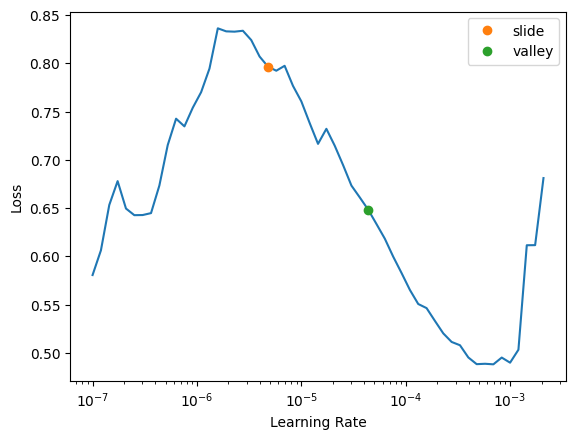

In [33]:
learn.lr_find(suggest_funcs=[slide, valley])


In [34]:
learn.fit_one_cycle(5,lr_max=3e-5, cbs=fit_cbs)



epoch,train_loss,valid_loss,accuracy,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time
0,0.075714,0.087954,0.909650,0.672755,0.662253,0.672481,0.913512,0.978850,0.944810,04:39
1,0.063865,0.066742,0.910005,0.688117,0.677692,0.688447,0.914386,0.980429,0.945916,04:09
2,0.054431,0.068876,0.910281,0.674618,0.663815,0.674841,0.911374,0.979417,0.943895,04:11
3,0.020316,0.060841,0.910380,0.669496,0.658951,0.669869,0.905747,0.980476,0.941348,04:19
4,0.015641,0.070275,0.910419,0.651469,0.641661,0.651458,0.902280,0.975085,0.936987,04:34


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [35]:
learn.show_results(learner=learn, max_n=2)


In [36]:
test_article="Pippa Middleton showed off her toned physique in a blue gingham one-piece during a day at the beach in St Barts with her husband and children.The mother-of-three, 40, wore tblue-and-white patterned swimsuit for her day out on Gouverneur beach, near the £90m estate of Russian oligarch Roman Abramovich.ippa, her husband James Matthews and their three children have spent weeks enjoying the winter sun at Eden Rock Beach, which is owned by James' family.However, they appeared to venture further afield for one of their final beach days on the Caribbean island before heading home to their £15m Berkshire mansion.During the family getaway, the Princess of Wales' younger sister has worn over £2,000 worth of designer swimwear and accessories. "

In [37]:
outputs = learn.blurr_summarize(test_article, early_stopping=True, num_beams=4, num_return_sequences=3)

for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
{'summary_texts': [" Pippa Middleton wore tblue-and-white patterned swimsuit for her day out on Gouverneur beach, near the £90m estate of Russian oligarch Roman Abramovich. During the family getaway, the Princess of Wales' younger sister has worn over £2,000 worth of designer swimwear and accessories", " Pippa Middleton wore tblue-and-white patterned swimsuit for her day out on Gouverneur beach, near the £90m estate of Russian oligarch Roman Abramovich. During the family getaway, the Princess of Wales' younger sister has worn over £2,000 worth of designer swimwear and accessories", " Pippa Middleton wore tblue-and-white patterned swimsuit for her day out on Gouverneur beach, near the £90m estate of Russian oligarch Roman Abramovich. During the family getaway, the Princess of Wales' younger sister has worn over £2,000 worth of designer swimwear and accessories."]}



In [38]:
learn.metrics = None
learn.export('models/article_highlights_part2.pkl')

In [39]:
inf_learn = load_learner(fname='models/article_highlights_part2.pkl')
inf_learn.blurr_summarize(test_article)

[{'summary_texts': " Pippa Middleton wore tblue-and-white patterned swimsuit for her day out on Gouverneur beach, near the £90m estate of Russian oligarch Roman Abramovich. During the family getaway, the Princess of Wales' younger sister has worn over £2,000 worth of designer swimwear and accessories"}]